# KI Projekt Verkehrsszenario _ Verhaltensprädiktion

### Importieren der benötigten Bibliotheken

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

### Importieren des Datensatzes

In [246]:
df_all = pd.read_csv("SIM_002.csv", delimiter=";")
df_all.dtypes


v                    object
v_left               object
v_front              object
d_left                int64
d_front               int64
type_left            object
type_front           object
radius_curve(m)       int64
slope_street         object
street_type          object
time                 object
weather              object
type_vehicle         object
speed_limit(km/h)     int64
action               object
dtype: object

### Konvertieren der Objekt-Zahlenwerte zu Float Zahlenwerten
Nachdem auffällt, dass v, v_left und v_front als object eingelesen werden, müssen diese Spalten hier noch konvertiert werden.

In [247]:
df_all = df_all.replace(',','.', regex=True)
df_all['v'] = pd.to_numeric(df_all['v'])
df_all['v_left'] = pd.to_numeric(df_all['v_left'])
df_all['v_front'] = pd.to_numeric(df_all['v_front'])

df_all

,v,v_left,v_front,d_left,d_front,type_left,type_front,radius_curve(m),slope_street,street_type,time,weather,type_vehicle,speed_limit(km/h),action
0,38.0,40.0,31.0,-155,68,car,car,4761,flat,autobahn,night,dry,car,250,lane_change
1,23.5,23.5,22.0,-147,40,car,truck,1556,flat,autobahn,day,dry,truck,250,continue
2,24.5,36.5,22.0,-28,48,car,truck,3488,flat,country_road (separated),dusk,rain,motorcycle,100,continue
3,33.0,36.0,31.0,-26,59,truck,motorcycle,5576,flat,country_road (separated),dawn,rain,car,120,continue
4,28.0,41.0,22.0,-141,52,motorcycle,truck,2340,flat,country_road (separated),night,dry,motorcycle,120,lane_change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,36.0,40.0,31.5,-179,65,motorcycle,car,1600,flat,autobahn,day,dry,car,250,continue
497,25.5,32.5,19.5,-109,42,car,truck,1973,ascending,country_road (separated),night,dry,car,120,decelerate
498,36.5,36.0,31.0,-38,47,car,motorcycle,3029,flat,autobahn,day,dry,car,80,continue
499,32.0,35.0,29.5,-12,54,car,car,2605,flat,autobahn,day,dry,motorcycle,250,continue


### Umrechnen der Geschwindigkeiten von m/s auf Km/h
Dies wird gemacht, um einheitliche Werte zu haben. Maximalgeschwindigkeit und die Geschwindigkeiten der Autos unterscheiden sich in der Einheit.

In [248]:
df_all['v'] = df_all['v'] * 3.6
df_all['v_left'] = df_all['v_left'] * 3.6
df_all['v_front'] = df_all['v_front'] * 3.6

df_all

,v,v_left,v_front,d_left,d_front,type_left,type_front,radius_curve(m),slope_street,street_type,time,weather,type_vehicle,speed_limit(km/h),action
0,136.8,144.0,111.6,-155,68,car,car,4761,flat,autobahn,night,dry,car,250,lane_change
1,84.6,84.6,79.2,-147,40,car,truck,1556,flat,autobahn,day,dry,truck,250,continue
2,88.2,131.4,79.2,-28,48,car,truck,3488,flat,country_road (separated),dusk,rain,motorcycle,100,continue
3,118.8,129.6,111.6,-26,59,truck,motorcycle,5576,flat,country_road (separated),dawn,rain,car,120,continue
4,100.8,147.6,79.2,-141,52,motorcycle,truck,2340,flat,country_road (separated),night,dry,motorcycle,120,lane_change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,129.6,144.0,113.4,-179,65,motorcycle,car,1600,flat,autobahn,day,dry,car,250,continue
497,91.8,117.0,70.2,-109,42,car,truck,1973,ascending,country_road (separated),night,dry,car,120,decelerate
498,131.4,129.6,111.6,-38,47,car,motorcycle,3029,flat,autobahn,day,dry,car,80,continue
499,115.2,126.0,106.2,-12,54,car,car,2605,flat,autobahn,day,dry,motorcycle,250,continue


### Bereinigen des Datensets wo notwendig

In [249]:
df_all = df_all.loc[df_all["v"] != 0]
df_all

,v,v_left,v_front,d_left,d_front,type_left,type_front,radius_curve(m),slope_street,street_type,time,weather,type_vehicle,speed_limit(km/h),action
0,136.8,144.0,111.6,-155,68,car,car,4761,flat,autobahn,night,dry,car,250,lane_change
1,84.6,84.6,79.2,-147,40,car,truck,1556,flat,autobahn,day,dry,truck,250,continue
2,88.2,131.4,79.2,-28,48,car,truck,3488,flat,country_road (separated),dusk,rain,motorcycle,100,continue
3,118.8,129.6,111.6,-26,59,truck,motorcycle,5576,flat,country_road (separated),dawn,rain,car,120,continue
4,100.8,147.6,79.2,-141,52,motorcycle,truck,2340,flat,country_road (separated),night,dry,motorcycle,120,lane_change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,129.6,144.0,113.4,-179,65,motorcycle,car,1600,flat,autobahn,day,dry,car,250,continue
497,91.8,117.0,70.2,-109,42,car,truck,1973,ascending,country_road (separated),night,dry,car,120,decelerate
498,131.4,129.6,111.6,-38,47,car,motorcycle,3029,flat,autobahn,day,dry,car,80,continue
499,115.2,126.0,106.2,-12,54,car,car,2605,flat,autobahn,day,dry,motorcycle,250,continue


### Encoding der nicht-nummerischen Werte
Die folgenden features sind vom typ object und benötigen deshalb ein label encoding, damit später besser mit ihnen gearbeitet werden kann.
Das label encoding wird mit der Bibliothek scikit learn durchgeführt.
#### type-left:
* car -> 0
* motorcycle -> 1
* sportscar -> 2
* truck -> 3


In [250]:

print(df_all['type_left'].value_counts())

# Do the label encoding with sklearn
type_left_encoder = preprocessing.LabelEncoder().fit(df_all["type_left"])
print(dict(zip(type_left_encoder.classes_, type_left_encoder.transform(type_left_encoder.classes_))))
df_all["type_left"] = type_left_encoder.transform(df_all["type_left"])

car           323
truck         107
sportscar      36
motorcycle     35
Name: type_left, dtype: int64
{'car': 0, 'motorcycle': 1, 'sportscar': 2, 'truck': 3}


#### type-front:
* car -> 0
* motorcycle -> 1
* sportscar -> 2
* truck -> 3

In [251]:
print(df_all['type_front'].value_counts())

# Do the label encoding with sklearn
type_front_encoder = preprocessing.LabelEncoder().fit(df_all["type_front"])
print(dict(zip(type_front_encoder.classes_, type_front_encoder.transform(type_front_encoder.classes_))))
df_all["type_front"] = type_front_encoder.transform(df_all["type_front"])

truck         253
car           207
motorcycle     22
sportscar      19
Name: type_front, dtype: int64
{'car': 0, 'motorcycle': 1, 'sportscar': 2, 'truck': 3}


#### slope_street:
* ascending -> 0
* decending -> 1
* flat -> 2

In [252]:
print(df_all['slope_street'].value_counts())

# Do the label encoding with sklearn
slope_street_encoder = preprocessing.LabelEncoder().fit(df_all["slope_street"])
print(dict(zip(slope_street_encoder.classes_, slope_street_encoder.transform(slope_street_encoder.classes_))))
df_all["slope_street"] = slope_street_encoder.transform(df_all["slope_street"])

flat         324
ascending     99
decending     78
Name: slope_street, dtype: int64
{'ascending': 0, 'decending': 1, 'flat': 2}


#### street_type:
* autobahn -> 0
* country_road (separated) -> 1

In [253]:
print(df_all['street_type'].value_counts())

# Do the label encoding with sklearn
street_type_encoder = preprocessing.LabelEncoder().fit(df_all["street_type"])
print(dict(zip(street_type_encoder.classes_, street_type_encoder.transform(street_type_encoder.classes_))))
df_all["street_type"] = street_type_encoder.transform(df_all["street_type"])

country_road (separated)    353
autobahn                    148
Name: street_type, dtype: int64
{'autobahn': 0, 'country_road (separated)': 1}


#### time:
* dawn -> 0
* day -> 1
* dusk -> 2
* night -> 3

In [254]:
print(df_all['time'].value_counts())

# Do the label encoding with sklearn
time_encoder = preprocessing.LabelEncoder().fit(df_all["time"])
print(dict(zip(time_encoder.classes_, time_encoder.transform(time_encoder.classes_))))
df_all["time"] = time_encoder.transform(df_all["time"])

day      274
night    128
dawn      51
dusk      48
Name: time, dtype: int64
{'dawn': 0, 'day': 1, 'dusk': 2, 'night': 3}


#### weather:
* dry -> 0
* fog -> 1
* rain -> 2
* snow_ice -> 3

In [255]:
print(df_all['weather'].value_counts())

# Do the label encoding with sklearn
weather_encoder = preprocessing.LabelEncoder().fit(df_all["weather"])
print(dict(zip(weather_encoder.classes_, weather_encoder.transform(weather_encoder.classes_))))
df_all["weather"] = weather_encoder.transform(df_all["weather"])

dry         416
rain         74
fog          10
snow_ice      1
Name: weather, dtype: int64
{'dry': 0, 'fog': 1, 'rain': 2, 'snow_ice': 3}


#### type_vehicle:
* car -> 0
* motorcycle -> 1
* sportscar -> 2
* truck -> 3

In [256]:
print(df_all['type_vehicle'].value_counts())

# Do the label encoding with sklearn
type_vehicle_encoder = preprocessing.LabelEncoder().fit(df_all["type_vehicle"])
print(dict(zip(type_vehicle_encoder.classes_, type_vehicle_encoder.transform(type_vehicle_encoder.classes_))))
df_all["type_vehicle"] = type_vehicle_encoder.transform(df_all["type_vehicle"])

car           312
truck         125
sportscar      34
motorcycle     30
Name: type_vehicle, dtype: int64
{'car': 0, 'motorcycle': 1, 'sportscar': 2, 'truck': 3}


#### action:
One Hot Encoding für alle action Werte um sie einzeln betrachten zu können für die Korrelationen. Dies ist eine Methode, um mit Attributen zu arbeiten, welche keine Nominalskala haben, die Korrelationen trotzdem interessant ist. Bei anderen Attributen wurde darauf verzichtet, da die Korrelation hier weniger interessant ist. 

In [257]:
df_analysis = df_all.copy()
actions = ['accelerated_lane_change', 'continue', 'decelerate', 'lane_change']
for x in actions:
    df_analysis["{}".format(x)] = np.where(df_analysis.action == x, 1, 0)
    
df_analysis

,v,v_left,v_front,d_left,d_front,type_left,type_front,radius_curve(m),slope_street,street_type,time,weather,type_vehicle,speed_limit(km/h),action,accelerated_lane_change,continue,decelerate,lane_change
0,136.8,144.0,111.6,-155,68,0,0,4761,2,0,3,0,0,250,lane_change,0,0,0,1
1,84.6,84.6,79.2,-147,40,0,3,1556,2,0,1,0,3,250,continue,0,1,0,0
2,88.2,131.4,79.2,-28,48,0,3,3488,2,1,2,2,1,100,continue,0,1,0,0
3,118.8,129.6,111.6,-26,59,3,1,5576,2,1,0,2,0,120,continue,0,1,0,0
4,100.8,147.6,79.2,-141,52,1,3,2340,2,1,3,0,1,120,lane_change,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,129.6,144.0,113.4,-179,65,1,0,1600,2,0,1,0,0,250,continue,0,1,0,0
497,91.8,117.0,70.2,-109,42,0,3,1973,0,1,3,0,0,120,decelerate,0,0,1,0
498,131.4,129.6,111.6,-38,47,0,1,3029,2,0,1,0,0,80,continue,0,1,0,0
499,115.2,126.0,106.2,-12,54,0,0,2605,2,0,1,0,1,250,continue,0,1,0,0


Text(0.5, 1.0, 'Korrelation Heatmap aller Attribute')

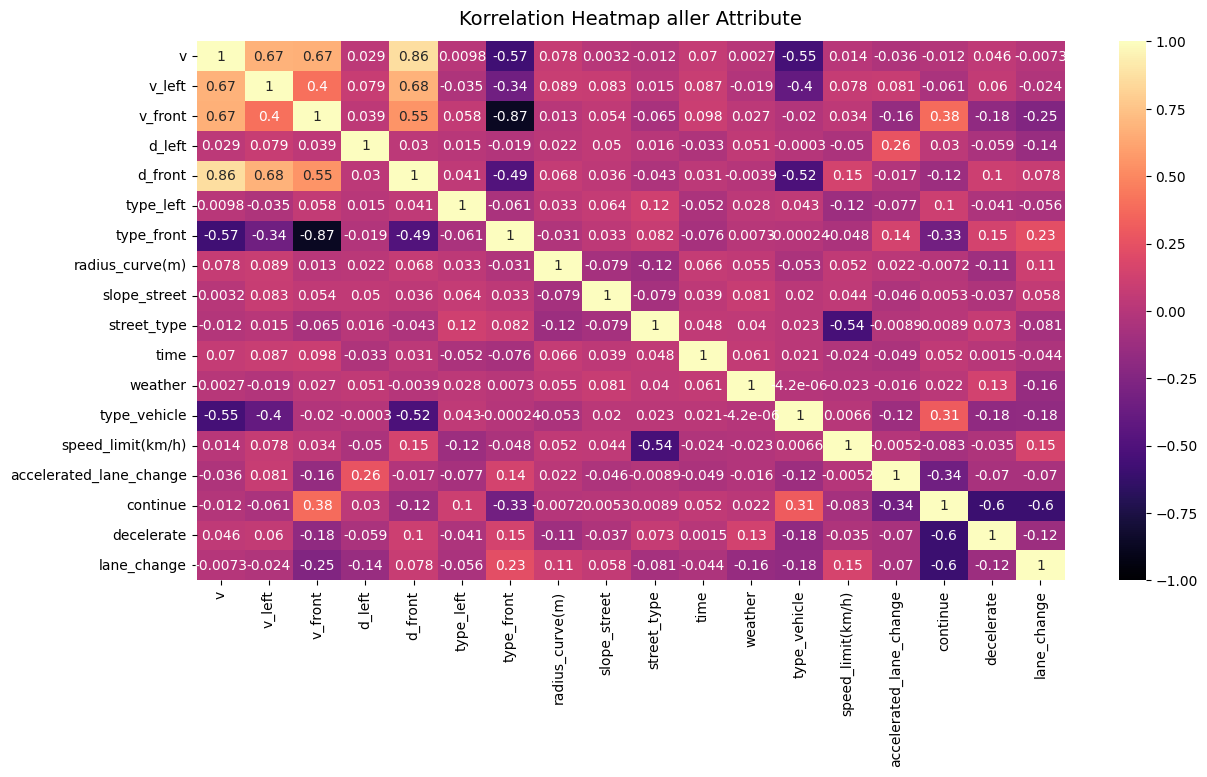

In [258]:
plt.figure(figsize=(14, 7))
sns.heatmap(data=df_analysis.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap="magma").set_title('Korrelation Heatmap aller Attribute', fontdict={'fontsize': 14}, pad=12)

### Evaluation der Korrelationsheatmap
Da die Geschwindigkeit ein zentraler Faktor in der Überholungs-Überlegung ist, wird diese zuerst betrachtet. Sie korreliert in der Heatmap sehr stark mit v_left, ``v_front`` und ``d_front``. Außerdem ist auffällig, dass eine negative Korrelation mit ``type_front`` und ``type_vehicle`` besteht. Diese kann aber wegen nicht vorhandener Rangordnung in den Attributen allerdings nicht in Betracht gezogen werden. 

type_front korreliert zwar mit `v`, `v_left`, `v_front` und `d_front` negativ, allerdings ist auch hier keine Nominalskala vorhanden.

Der wichtigste Faktor für das Training ist ``action``. Dieser Wert teilt sich hier in vier verschiedene Attribute auf. Es ist eine leichte Korrelation zwischen der ``action`` 'continue' und ``v_front`` zu erkennen. Vermutlich wird also eher 'continue' gewählt, wenn der Abstand zum vorrausfahrenden Auto größer ist. 
``v_front`` korreliert außerdem auch leicht negativ mit den anderen ``action``s, dabei am stärksten mit ``lane_change``. Also je kleiner der Abstand zum vorrausfahrenden Auto ist, desto eher wird abgebremst, Spur gewechselt oder beschleunigt die Spur gewechselt.

Außerdem ist zwischen ``accelerated_lane_change`` und ``d_left`` eine leichte Korrelation zu erkennen. Je weiter das Auto auf der linken Spur also entfernt ist, desto größer ist die Wahrscheinlichkeit für einen beschleunigten Spurwechsel. 


### Geschwindigkeit Differenz berechnen zur action-Bewertung
Dazu werden zum einem die Differnz der Geschwindigkeiten von 'v' und 'v_front' berechnet, um einschätzen zu können, ob die Geschwindigkeit beibehalten werden soll, ob verzögert oder überholt soll. 

Außerdem werden 'v' und 'v_left' verglichen, um bewerten zu können, ob und wie (mit oder ohne Beschleunigung) eine Überholung stattfinden soll.

In [259]:
for i in range(1, len(df_all) +1):
    df_all['delta_vFront'] = df_all['v'] - df_all['v_front']
    df_all['delta_vLeft'] = df_all['v'] - df_all['v_left']

df_all


,v,v_left,v_front,d_left,d_front,type_left,type_front,radius_curve(m),slope_street,street_type,time,weather,type_vehicle,speed_limit(km/h),action,delta_vFront,delta_vLeft
0,136.8,144.0,111.6,-155,68,0,0,4761,2,0,3,0,0,250,lane_change,25.2,-7.2
1,84.6,84.6,79.2,-147,40,0,3,1556,2,0,1,0,3,250,continue,5.4,0.0
2,88.2,131.4,79.2,-28,48,0,3,3488,2,1,2,2,1,100,continue,9.0,-43.2
3,118.8,129.6,111.6,-26,59,3,1,5576,2,1,0,2,0,120,continue,7.2,-10.8
4,100.8,147.6,79.2,-141,52,1,3,2340,2,1,3,0,1,120,lane_change,21.6,-46.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,129.6,144.0,113.4,-179,65,1,0,1600,2,0,1,0,0,250,continue,16.2,-14.4
497,91.8,117.0,70.2,-109,42,0,3,1973,0,1,3,0,0,120,decelerate,21.6,-25.2
498,131.4,129.6,111.6,-38,47,0,1,3029,2,0,1,0,0,80,continue,19.8,1.8
499,115.2,126.0,106.2,-12,54,0,0,2605,2,0,1,0,1,250,continue,9.0,-10.8


In [273]:
# # Split train and test data
# X = df_all.drop(columns=["action"])
# Y = df_all["action"]
# X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
# X_train.dtypes

train_data = df_all.loc[:401]
test_data = df_all.loc[402:]


In [261]:
def check_for_same(input):
    # input = input.drop(columns=["action"])
    # input = input.iloc[0]
    for index, row in train_data.iterrows():
        if input['v'] == row['v'] and input['v_left'] == row['v_left'] and input['v_front'] == row['v_front'] and input['d_left'] == row['d_left'] and input['d_front'] == row['d_front'] and input['type_left'] == row['type_left'] and input['type_front'] == row['type_front'] and input['radius_curve(m)'] == row['radius_curve(m)'] and input['slope_street'] == row['slope_street'] and input['street_type'] == row['street_type'] and input['time'] == row['time'] and input['weather'] == row['weather'] and input['type_vehicle'] == row['type_vehicle'] and input['speed_limit(km/h)'] == row['speed_limit(km/h)'] and input['delta_vFront'] == row['delta_vFront'] and input['delta_vLeft'] == row['delta_vLeft']:
            print('found same entrys')
            return row
    return 0

Überlegung: 

- alle Attribute vergeleichen und dabei Gewichten 
- mit den Gewichten dann in eine Formel packen 
- kleinsten Wert nach Vergelich mit allen Zeilen auswählen und diese action dann anwenden 

dabei müsste man dann noch Gewichtungen festlegen und schauen welche Formel geht
-> höhrere Korrelation -> höhere Gewichtung 

In [298]:
def similarity_v(default, to_compare):
    return 1 - ((abs(default - to_compare))/(abs(default) + abs(to_compare)))

def similarity_v_left(default, to_compare):
    return similarity_v(default, to_compare)

def similarity_v_front(default, to_compare):
    return similarity_v(default, to_compare)

def similarity_d_left(default, to_compare):
    return 0

def similarity_d_front(default, to_compare):
    return similarity_v(default, to_compare)

def similarity_radius_curve(default, to_compare):
    return similarity_v(default, to_compare)

def similarity_speed_limit(default, to_compare):
    return similarity_v(default, to_compare)

def similarity_delta_vFront(default, to_compare):
    return similarity_v(default, to_compare)

def similarity_delta_vLeft(default, to_compare):
    return 0

### Distanzberechnung der type_left, type_front und type_vehicle Fahrzeuge
0: motorcycle and truck<br>
0.1: sportscar and truck<br>
0.3: car and motorcycle<br>
0.5: sportscar and motorcycle<br>
0.6: car and truck<br>
0.8: car and sportscar<br>
1: same<br>

In [263]:
# 0 = car, 1 = motorcycle, 2 = sportscar, 3 = truck
def similarity_type_left(default, to_compare):
    # print(default.dtype)
    # print(to_compare.dtype)
    if (default == 1 and to_compare == 3) or (default == 3 and to_compare == 1): # motorcycle and truck
        return 0.0
    if (default == 2 and to_compare == 3) or (default == 3 and to_compare == 2): # sportscar and truck
        return 0.1
    if (default == 0 and to_compare == 1) or (default == 1 and to_compare == 0): # car and motorcycle
        return 0.3
    if (default == 2 and to_compare == 1) or (default == 1 and to_compare == 2): # sportscar and motorcycle
        return 0.5
    if (default == 0 and to_compare == 3) or (default == 3 and to_compare == 0): # car and truck
        return 0.6
    if (default == 0 and to_compare == 2) or (default == 2 and to_compare == 0): # car and sportscar
        return 0.8    
    if (default == to_compare): # same
        return 1.0


def similarity_type_front(default, to_compare):
    return similarity_type_left(default, to_compare)


def similarity_type_vehicle(default, to_compare):
    return similarity_type_left(default, to_compare)

In [264]:
# ascending = 0, descending = 1, flat = 2
def similarity_slope_street(default, to_compare):
    if (default == 1 and to_compare == 2) or (default == 2 and to_compare == 1): # descending and flat
        return 0.5
    elif (default == 0 and to_compare == 2) or (default == 2 and to_compare == 0): # ascending and flat
        return 0.5
    elif default == to_compare:
        return 1
    else:
        return 0   

In [265]:
def similarity_street_type(default, to_compare):
    if default == to_compare:
        return 1
    else:
        return 0

### Distanzberechnung für das Wetter
0.0: dry and snow ice<br>
0.1: fog and snow ice<br>
0.1: rain and snow ice<br>
0.5: dry and fog<br>
0.6: fog and rain<br>
0.8: dry and rain<br>
1: same<br>

In [266]:
# dry = 0, fog = 1, rain = 2, snow_ice = 3 
def similarity_weather(default, to_compare):
    if (default == 0 and to_compare == 3) or (default == 3 and to_compare == 0): # dry and snow-ice 
        return 0
    if (default == 1 and to_compare == 3) or (default == 3 and to_compare == 1): # fog and snow-ice 
        return 0.1
    if (default == 2 and to_compare == 3) or (default == 3 and to_compare == 2): # rain and snow-ice 
        return 0.1
    if (default == 0 and to_compare == 1) or (default == 1 and to_compare == 0): # dry and fog 
        return 0.5
    if (default == 2 and to_compare == 1) or (default == 1 and to_compare == 2): # fog and rain
        return 0.6
    if (default == 2 and to_compare == 0) or (default == 0 and to_compare == 2): # dry and rain
        return 0.8
    if (default == to_compare): # same
        return 1.0

### Distanzberechnung für die verschiedenen Tageszeiten
0: day and night<br>
0.4: dusk and night<br>
0.5: dawn and night<br>
0.5: day and dawn<br>
0.6: day and dusk<br>
0.8: dawn and dusk<br>
1: same<br>

In [267]:
# dawn = 0, day = 1, dusk = 2, night = 3
def similarity_time(default, to_compare):
    if (default == 1 and to_compare == 3) or (default == 3 and to_compare == 1): # day and night
        return 0.0
    if (default == 2 and to_compare == 3) or (default == 3 and to_compare == 2): # dusk and night
        return 0.4
    if (default == 0 and to_compare == 3) or (default == 3 and to_compare == 0): # dawn and night
        return 0.5
    if (default == 0 and to_compare == 1) or (default == 1 and to_compare == 0): # day and dawn
        return 0.5
    if (default == 1 and to_compare == 2) or (default == 2 and to_compare == 1): # day and dusk
        return 0.6
    if (default == 0 and to_compare == 2) or (default == 2 and to_compare == 0): # dawn and dusk
        return 0.8    
    if (default == to_compare): # same
        return 1.0

In [292]:
# try to find the most similar case 
def check_for_similar(input):
    #sim = [] 
    # weights setting:
    weight_v = 1
    weight_v_left = 1
    weight_v_front = 1
    weight_d_left = 1
    weight_d_front = 1
    weight_type_left = 1
    weight_type_front = 1
    weightradius_curve = 1
    weight_slope_street = 1
    weight_street_type = 1
    weight_time = 1
    weight_weather = 1
    weight_type_vehicle = 1
    weight_speed_limit = 1
    weight_delta_vFront = 1
    weight_delta_vLeft = 1

    max_sim = 0
    max_row = 0
    # comparing attributes from training_data and input 
    for i in range(len(train_data)):
        row = train_data.iloc[i]
        similarity = weight_v * similarity_v(input['v'], row['v'])\
        + weight_v_left * similarity_v_left(input['v_left'], row['v_left']) \
        + weight_v_front * similarity_v_front(input['v_front'], row['v_front']) \
        + weight_d_left * similarity_d_left(input['d_left'], row['d_left'])  \
        + weight_d_front * similarity_d_front(input['d_front'], row['d_front'])  \
        + weight_type_left * similarity_type_left(input['type_left'], row['type_left'])  \
        + weight_type_front * similarity_type_front(input['type_front'], row['type_front']) \
        + weightradius_curve * similarity_radius_curve(input['radius_curve(m)'],row['radius_curve(m)']) \
        + weight_slope_street * similarity_slope_street(input['slope_street'], row['slope_street']) \
        + weight_street_type * similarity_street_type(input['street_type'], row['street_type']) \
        + weight_time * similarity_time(input['time'], row['time']) \
        + weight_weather * similarity_weather(input['weather'], row['weather']) \
        + weight_type_vehicle * similarity_type_vehicle(input['type_vehicle'], row['type_vehicle']) \
        + weight_speed_limit * similarity_speed_limit(input['speed_limit(km/h)'], row['speed_limit(km/h)']) \
        + weight_delta_vFront * similarity_delta_vFront(input['delta_vFront'], row['delta_vFront']) \
        + weight_delta_vLeft *  similarity_delta_vLeft(input['delta_vLeft'], row['delta_vLeft'])
        if similarity > max_sim:
            max_row = row
            max_sim = similarity
        #sim.append([similarity, row])

     # use highest similarity 
    #print(sim)
    # print(max_sim)
    return max_row

In [293]:
def do_prediction(input, print = False):
    # input = prepare_user_input(v,v_left,v_front,d_left,d_front,type_left,type_front,radius_curve,slope_street,street_type,time,weather,type_vehicle,speed_limit,action)
    # input = pd.DataFrame([input])
    
    # print(X_train.iloc[0])
    prediction = check_for_same(input)
    if prediction == 0:
        prediction = check_for_similar(input)
    # debug mode
    if print:
        print(input)
        print("-Prediction-")
        print(prediction)
    return prediction['action']

def prepare_user_input(v,v_left,v_front,d_left,d_front,type_left,type_front,radius_curve,slope_street,street_type,time,weather,type_vehicle,speed_limit,action):
    v = v * 3.6
    v_left = v_left * 3.6
    v_front = v_front * 3.6
    # Encoding non-numeric values 
    type_left = type_left_encoder.transform([type_left])
    type_front = type_front_encoder.transform([type_front])
    slope_street = slope_street_encoder.transform([slope_street])
    street_type = street_type_encoder.transform([street_type])
    time = time_encoder.transform([time])
    weather =  weather_encoder.transform([weather])
    type_vehicle = type_vehicle_encoder.transform([type_vehicle])
    delta_vFront = v - v_front
    delta_vLeft = v - v_left

    return {
        'v': v,
        'v_left': v_left,
        'v_front': v_front,
        'd_left': d_left,
        'd_front': d_front,
        'type_left': type_left[0],
        'type_front': type_front[0],
        'radius_curve(m)': radius_curve,
        'slope_street': slope_street[0],
        'street_type': street_type[0],
        'time': time[0],
        'weather': weather[0],
        'type_vehicle': type_vehicle[0],
        'speed_limit(km/h)': speed_limit,
        'action': action,
        'delta_vFront': delta_vFront,
        'delta_vLeft': delta_vLeft
    }

# do_prediction(38,40,31,-155,68,'car','car',4761,'flat','autobahn','night','dry','car',250,'lane_change')
# do_prediction(38,38,31.5,-124,60,'car','car',4166,'decending','country_road (separated)','day','dry','car',120,'continue')

In [300]:
def evaluate_accuracy():
    accuracy = 0
    for i in range(len(test_data)):
        row = test_data.iloc[i]
        prediction = do_prediction(row)
        if prediction == row['action']:
            accuracy += 1
    accuracy = accuracy / len(test_data)
    print('accuracy is: ', accuracy)

evaluate_accuracy()


/var/folders/ly/hxdgfys160n0wq468njz15240000gn/T/ipykernel_10379/1573174262.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - ((abs(default - to_compare))/(abs(default) + abs(to_compare)))


accuracy is:  0.8
